## Import important libraries 

In [137]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression , Ridge , Lasso 
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV , train_test_split 

In [139]:
pwd

'/Users/makhtar/Documents/learnpython/project_1_datacleaning_&_EDA_resources'

### Download Excel file

In [140]:
df = pd.read_excel('data/premiums.xlsx')

In [4]:
df.shape

(50000, 13)

In [5]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [6]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [8]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [9]:
df.head(4)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303


### Handle Null Values 

In [10]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [11]:
df.dropna(inplace = True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### Handle Duplicated Value

In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

## Explorartory Data Analysis - EDA

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.



In [13]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. .

In [14]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
dtype: object

In [15]:
df.select_dtypes(['int64']).head(2)

,age,number_of_dependants,income_lakhs,annual_premium_amount
0,26,0,6,9053
1,29,2,6,16339


#### Visualize the outliers using box-plot in above EDA

In [16]:
numeric_columns = df.select_dtypes(['int64']).columns 
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

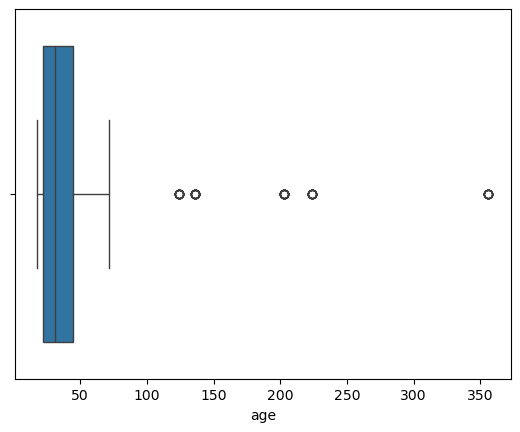

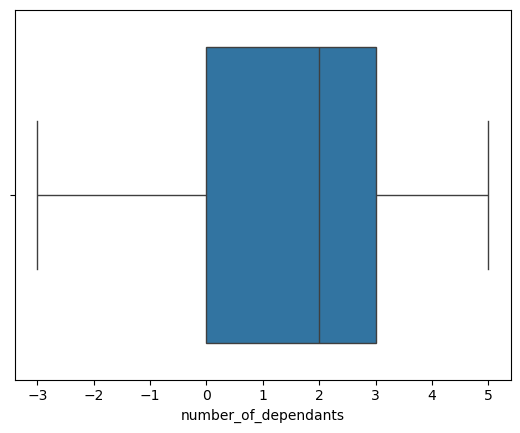

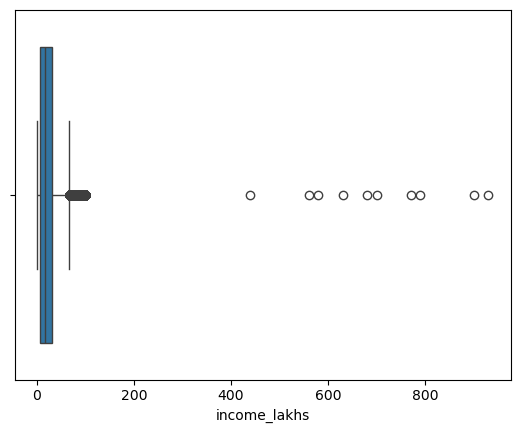

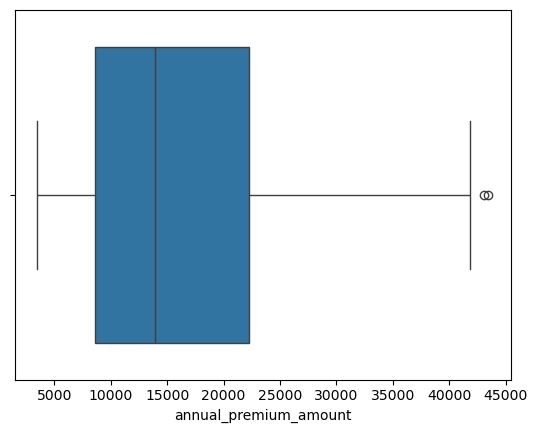

In [17]:
for col in numeric_columns:
    sns.boxplot(x = df[col])
    plt.show()

### Treating outlier in Age 

In [18]:
df[df.age > 100].shape

(58, 13)

In [19]:
df[df.age > 100]['age'].unique()

array([224, 124, 136, 203, 356])

In [20]:
df1 = df[df.age < 100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.712168,23.025141,15766.589286
std,13.681600,1.498324,24.227912,8419.137327
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


### Treatment of outliers in number_of_dependants Variable

In [21]:
df1[df1.number_of_dependants < 0 ].shape

(72, 13)

In [22]:
df1[df1.number_of_dependants < 0 ]['number_of_dependants'].unique()

array([-3, -1])

In [23]:
df1.number_of_dependants = abs(df1['number_of_dependants'])
df1.number_of_dependants.describe()

count    49918.000000
mean         1.717617
std          1.492074
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [24]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


### Outlier treament in Income_lakhs

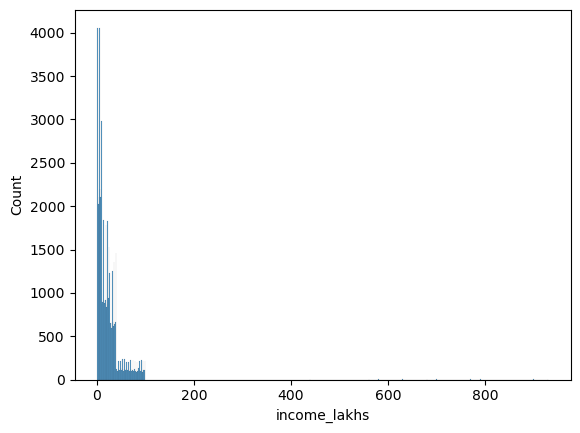

In [25]:
sns.histplot(df1['income_lakhs'])
plt.show()

In [26]:
df1['income_lakhs'].describe(percentiles = [0.25, 0.50, 0.75, 0.90, 0.95 , 0.99, 0.999])

count    49918.000000
mean        23.025141
std         24.227912
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
90%         54.000000
95%         77.000000
99%         96.000000
99.9%      100.000000
max        930.000000
Name: income_lakhs, dtype: float64

In [27]:
df1[df1['income_lakhs'] > 100.000000].shape 

(10, 13)

In [28]:
df1['income_lakhs'].quantile([0.25, 0.75])

0.25     7.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [30]:
def get_iqr_bound(col):
    Q1 , Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound , upper_bound

In [31]:
get_iqr_bound(df1['income_lakhs'])

(-29.0, 67.0)

In [32]:
quantile_threshold = df1['income_lakhs'].quantile(0.999)
quantile_threshold

100.0

In [33]:
df1[df1.income_lakhs > quantile_threshold].shape

(10, 13)

In [34]:
df2 = df1[df1.income_lakhs <= quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


In [945]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


### Examine the Distribution of the Target Column

The target is what we are asked to predict 

In [35]:
df2['annual_premium_amount'].value_counts()

annual_premium_amount
8351     11
9564     11
16056    10
7821     10
9395      9
         ..
8303      1
19089     1
20945     1
14418     1
27076     1
Name: count, Length: 23164, dtype: int64

- Average insurance premium amount is 15.5k
- Minimum insurance premium amount is 3.5k
- Maximum insurance premium amount is 43k

In [37]:
df2['annual_premium_amount'].mean() , df2['annual_premium_amount'].max() , df2['annual_premium_amount'].min()

(15765.739640939328, 43471, 3501)

In [ ]:
df2['annual_premium_amount'].plot.hist();

#### Plot graphs to visualize Numeric colums such as age,number_of_dependants,income_lakhs,annual_premium_amount.

In [38]:
numeric_columns = df.select_dtypes(['int64']).columns 
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

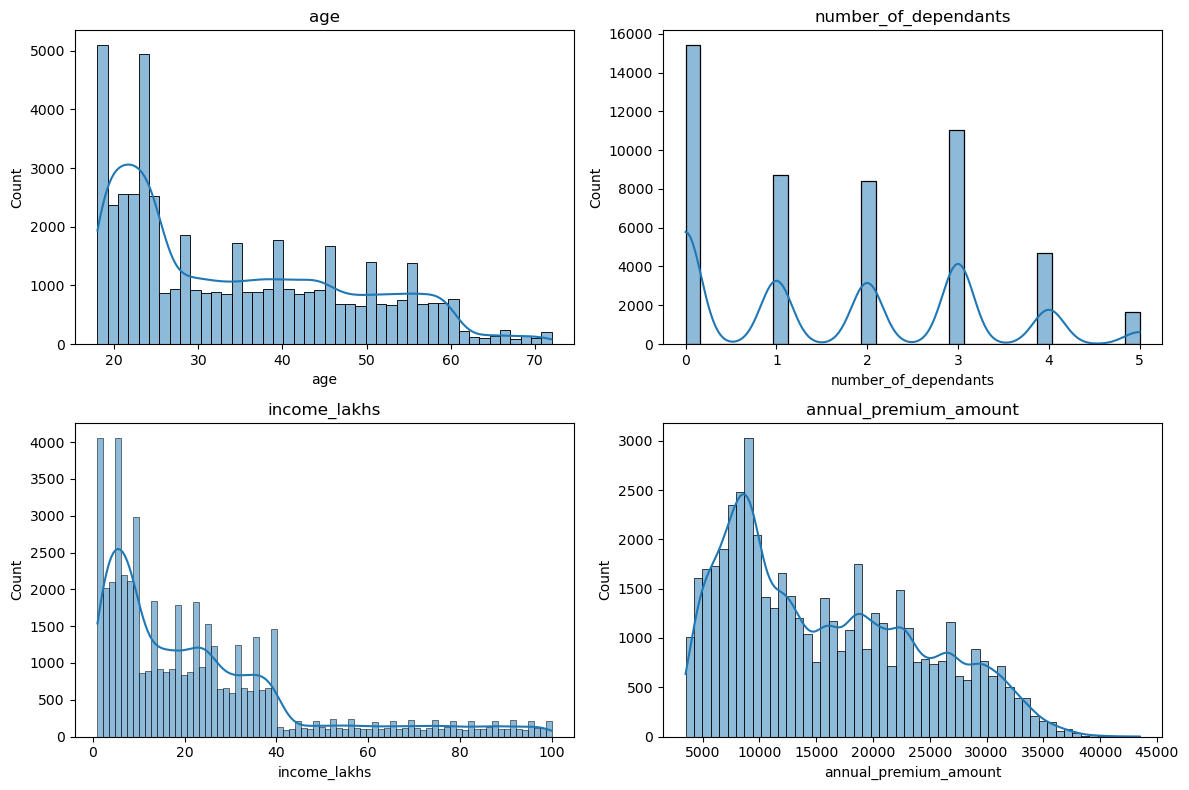

In [39]:
num_rows = 2
# create subplot 
fig, axes = plt.subplots(num_rows , ncols = 2 , figsize = (12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# create subplot for each categorical columns
for i, col in enumerate(numeric_columns):
    sns.histplot(x = df2[col],ax = axes[i], kde = True)
    axes[i].set_title(col)
    # Rotate x_axis label for better readibility
    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45)
# hide any unused subplots
#for i in range(len(col), len(axes)):
    #fig.delaxes(axes[i])
plt.tight_layout()   
plt.show()    

<Axes: xlabel='age', ylabel='annual_premium_amount'>

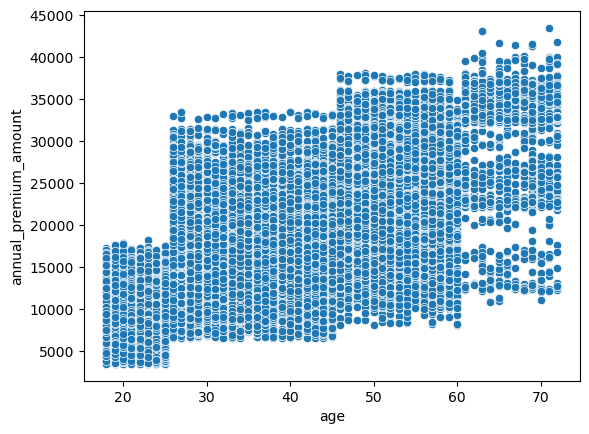

In [950]:
sns.scatterplot(df2 , x = 'age' , y='annual_premium_amount')

Plot graphs to visualize Numeric colums such as age,number_of_dependants,income_lakhs v/s annual_premium_amount.

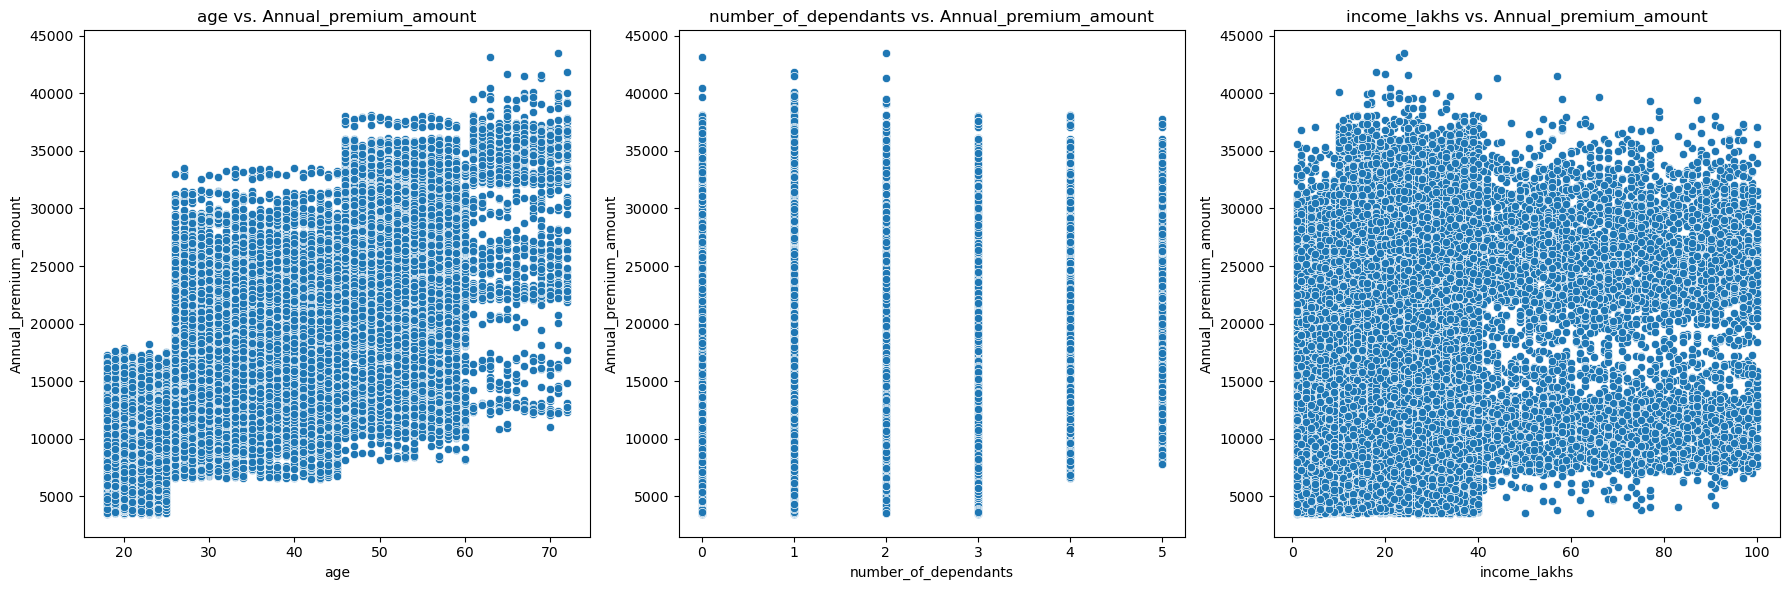

In [40]:
columns_feature = ['age', 'number_of_dependants', 'income_lakhs']
# create subplot 
fig, axes = plt.subplots(1 , len(columns_feature), figsize = (18,6))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# create subplot for each categorical columns
for i, col in enumerate(columns_feature):
    sns.scatterplot(x = df2[col],y = df2['annual_premium_amount'],ax = axes[i])
    axes[i].set_title(f'{col} vs. Annual_premium_amount')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Annual_premium_amount')
    
#Adjust the layout
plt.tight_layout()   
plt.show()    

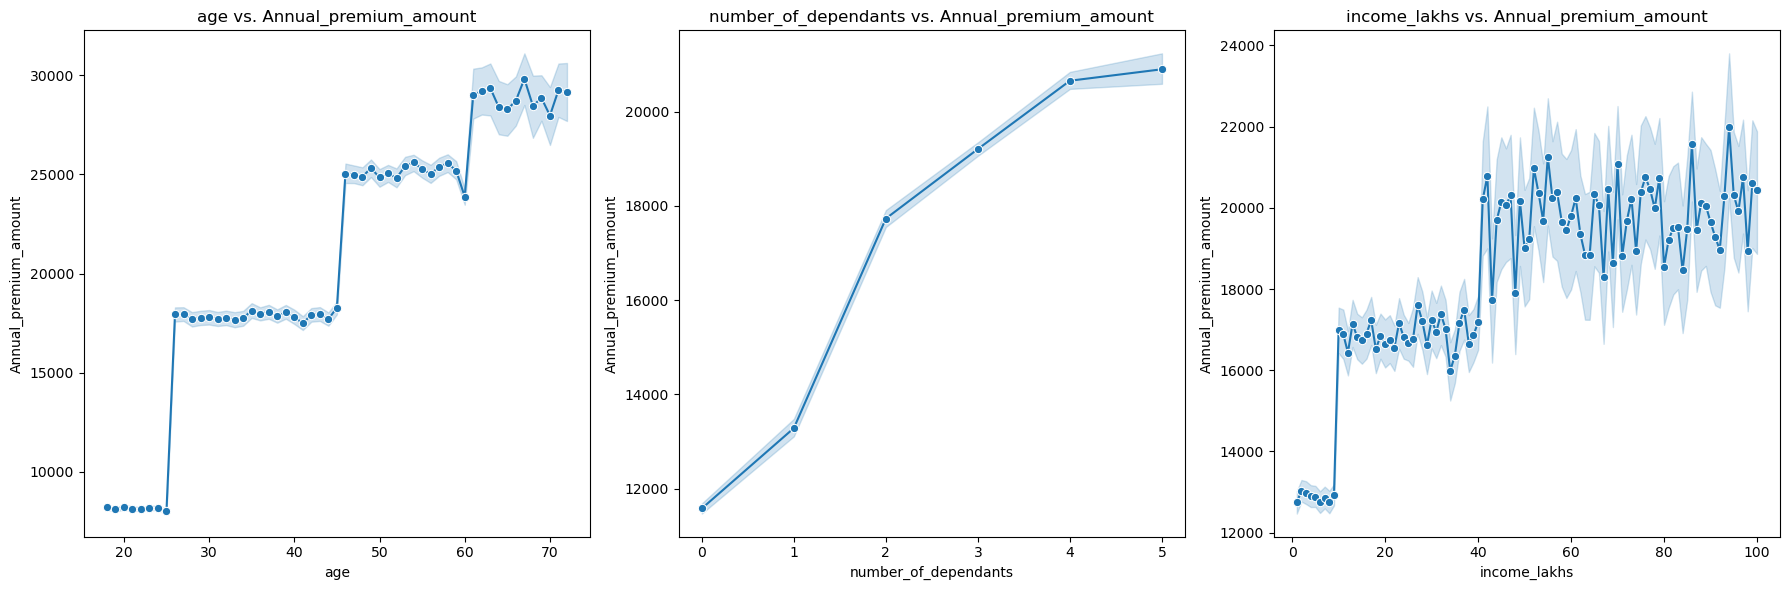

In [41]:
columns_feature = ['age', 'number_of_dependants', 'income_lakhs']
# Create subplots
fig, axes = plt.subplots(1, len(columns_feature), figsize=(18, 6))

# Flatten the axes array
axes = axes.flatten()

# Create line plots for each feature
for i, col in enumerate(columns_feature):
    # Sort the DataFrame by the feature column for proper line plotting
    df2_sorted = df2.sort_values(by=col)  # Sort by the current column

    sns.lineplot(x=df2_sorted[col], y=df2_sorted['annual_premium_amount'], ax=axes[i], marker='o') # Add marker for visibility
    axes[i].set_title(f'{col} vs. Annual_premium_amount')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Annual_premium_amount')

# Adjust the layout
plt.tight_layout()
plt.show()


#### Categorical columns - Check Unique Value in each Columns

In [953]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level',
      'medical_history', 'insurance_plan']

for col in categorical_cols:
    print(col, ":" , df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [44]:
df2['smoking_status'].replace({
     'Smoking=0' :'No Smoking',
     'Does Not Smoke' : 'No Smoking',
     'Not Smoking':'No Smoking'
    },
inplace = True)
df2.smoking_status.unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [45]:
# Check treatment in smoking_status
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level',
      'medical_history', 'insurance_plan']

for col in categorical_cols:
    print(col, ":" , df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [47]:
pct_count = df2.gender.value_counts(normalize = True)
pct_count 

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

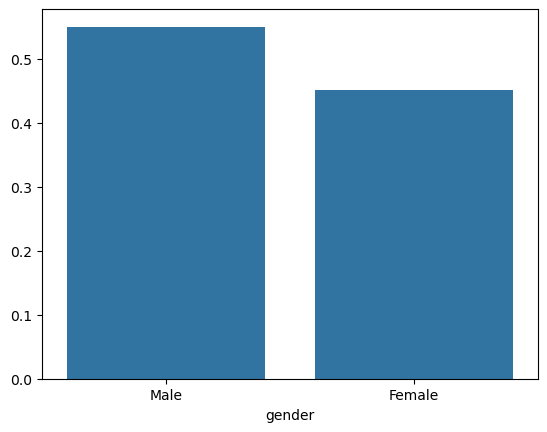

In [48]:
sns.barplot(x = pct_count.index , y = pct_count.values)

#### Plot a graphs to visualize the percentage distribution Categorical Columns 

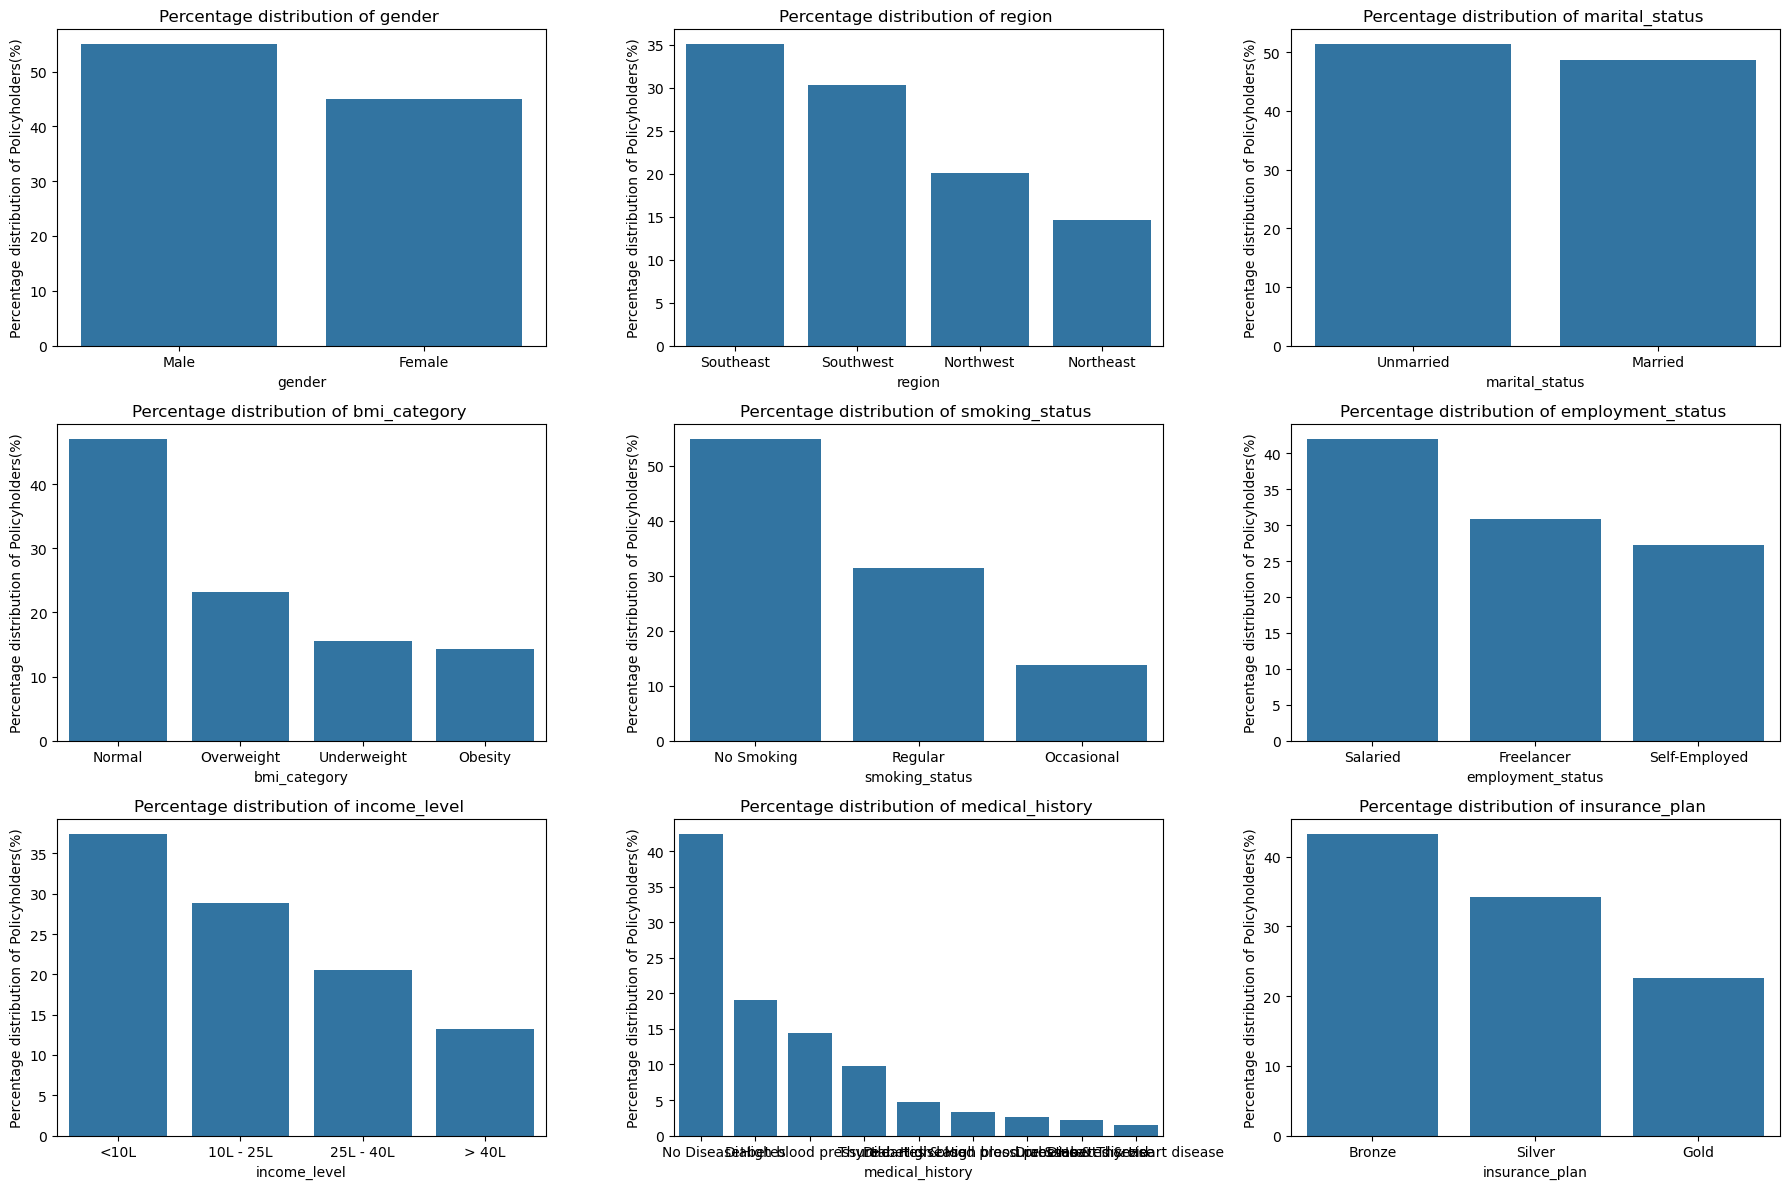

In [49]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level',
      'medical_history', 'insurance_plan']
# create subplot 
fig, axes = plt.subplots(3,3, figsize = (18,12))  # Adjust figsize as necessory

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# create subplot for each categorical columns
for i, col in enumerate(categorical_cols):
    # calculate the percentage distribution of each category 
    category_count = df2[col].value_counts(normalize = True) * 100

    # Plotting the distribution using barplot 
    sns.barplot(x = category_count.index,y = category_count.values ,ax = axes[i])
    axes[i].set_title(f'Percentage distribution of {col} ')
    axes[i].set_xlabel(col)  # set xlabel for columns name for better clarity
    axes[i].set_ylabel('Percentage distribution of Policyholders(%)')
    
#Adjust plot parameters for better fit in figure window
plt.tight_layout()   
plt.show()    

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5307  3880    5182
25L - 40L         3683  2840    3750
<10L             12226   931    5486
> 40L              329  3653    2641


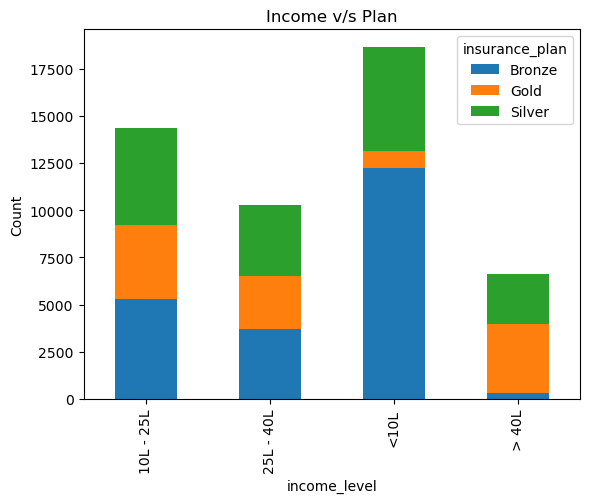

In [51]:
cross_tab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
print(cross_tab)

cross_tab.plot(kind = "bar", stacked = True)
plt.title('Income v/s Plan')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

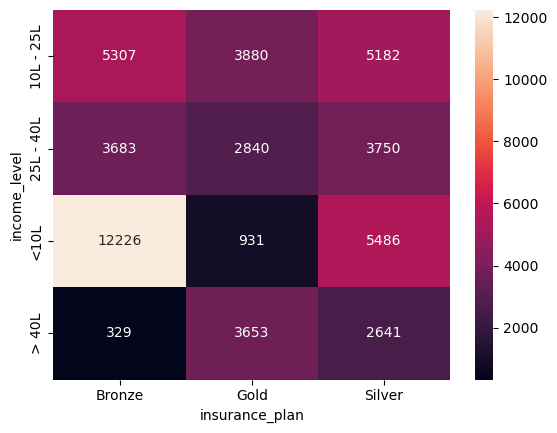

In [52]:
sns.heatmap(cross_tab , annot = True , fmt = 'd')

## Feature Engineering

In [53]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [54]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [55]:
df2.shape

(49908, 13)

### Label encodeing for ordinal data

In [57]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [58]:
risk_scores = ({
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6, 
    'thyroid' : 5 ,
    'no disease': 0,
    'none': 0
})     

In [59]:
df2.medical_history.str.split(" & ", expand = True )

,0,1
0,Diabetes,None
1,Diabetes,None
2,High blood pressure,None
3,No Disease,None
4,High blood pressure,None
...,...,...
49995,No Disease,None
49996,Thyroid,None
49997,No Disease,None
49998,No Disease,None


In [60]:
df2[['disease1','disease2']] = df2.medical_history.str.split(" & ", expand = True ).apply(lambda x : x.str.lower())

In [62]:
df2[['disease1','disease2']].sample(3)

,disease1,disease2
39181,diabetes,high blood pressure
47728,diabetes,None
4938,no disease,None


In [63]:
df2.fillna({'disease1':'none'}, inplace = True)
df2.fillna({'disease2':'none'}, inplace = True)

In [64]:
df2['total_risk_score'] = 0 

for disease in ['disease1','disease2']:
   df2['total_risk_score'] = df2['total_risk_score'] + df2[disease].map(risk_scores)


In [66]:
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
max_score , min_score

(14, 0)

In [69]:
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score )/(max_score - min_score)

In [70]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [71]:
df2['normalized_risk_score'].isna().sum()

0

In [72]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [73]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1 ,'Silver': 2,'Gold': 3})

In [74]:
df2.insurance_plan.unique()

array([1, 2, 3])

In [75]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [76]:
df2.income_level = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3,'> 40L':4})

In [77]:
df2.income_level.unique()

array([1, 2, 4, 3])

#### One - hot encoding for Nominal columns

In [78]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'disease1', 'disease2', 'total_risk_score',
       'normalized_risk_score'],
      dtype='object')

In [79]:
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2 , columns = nominal_cols, drop_first = True, dtype = int)      

In [80]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [81]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'], axis = 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


### Correlation 

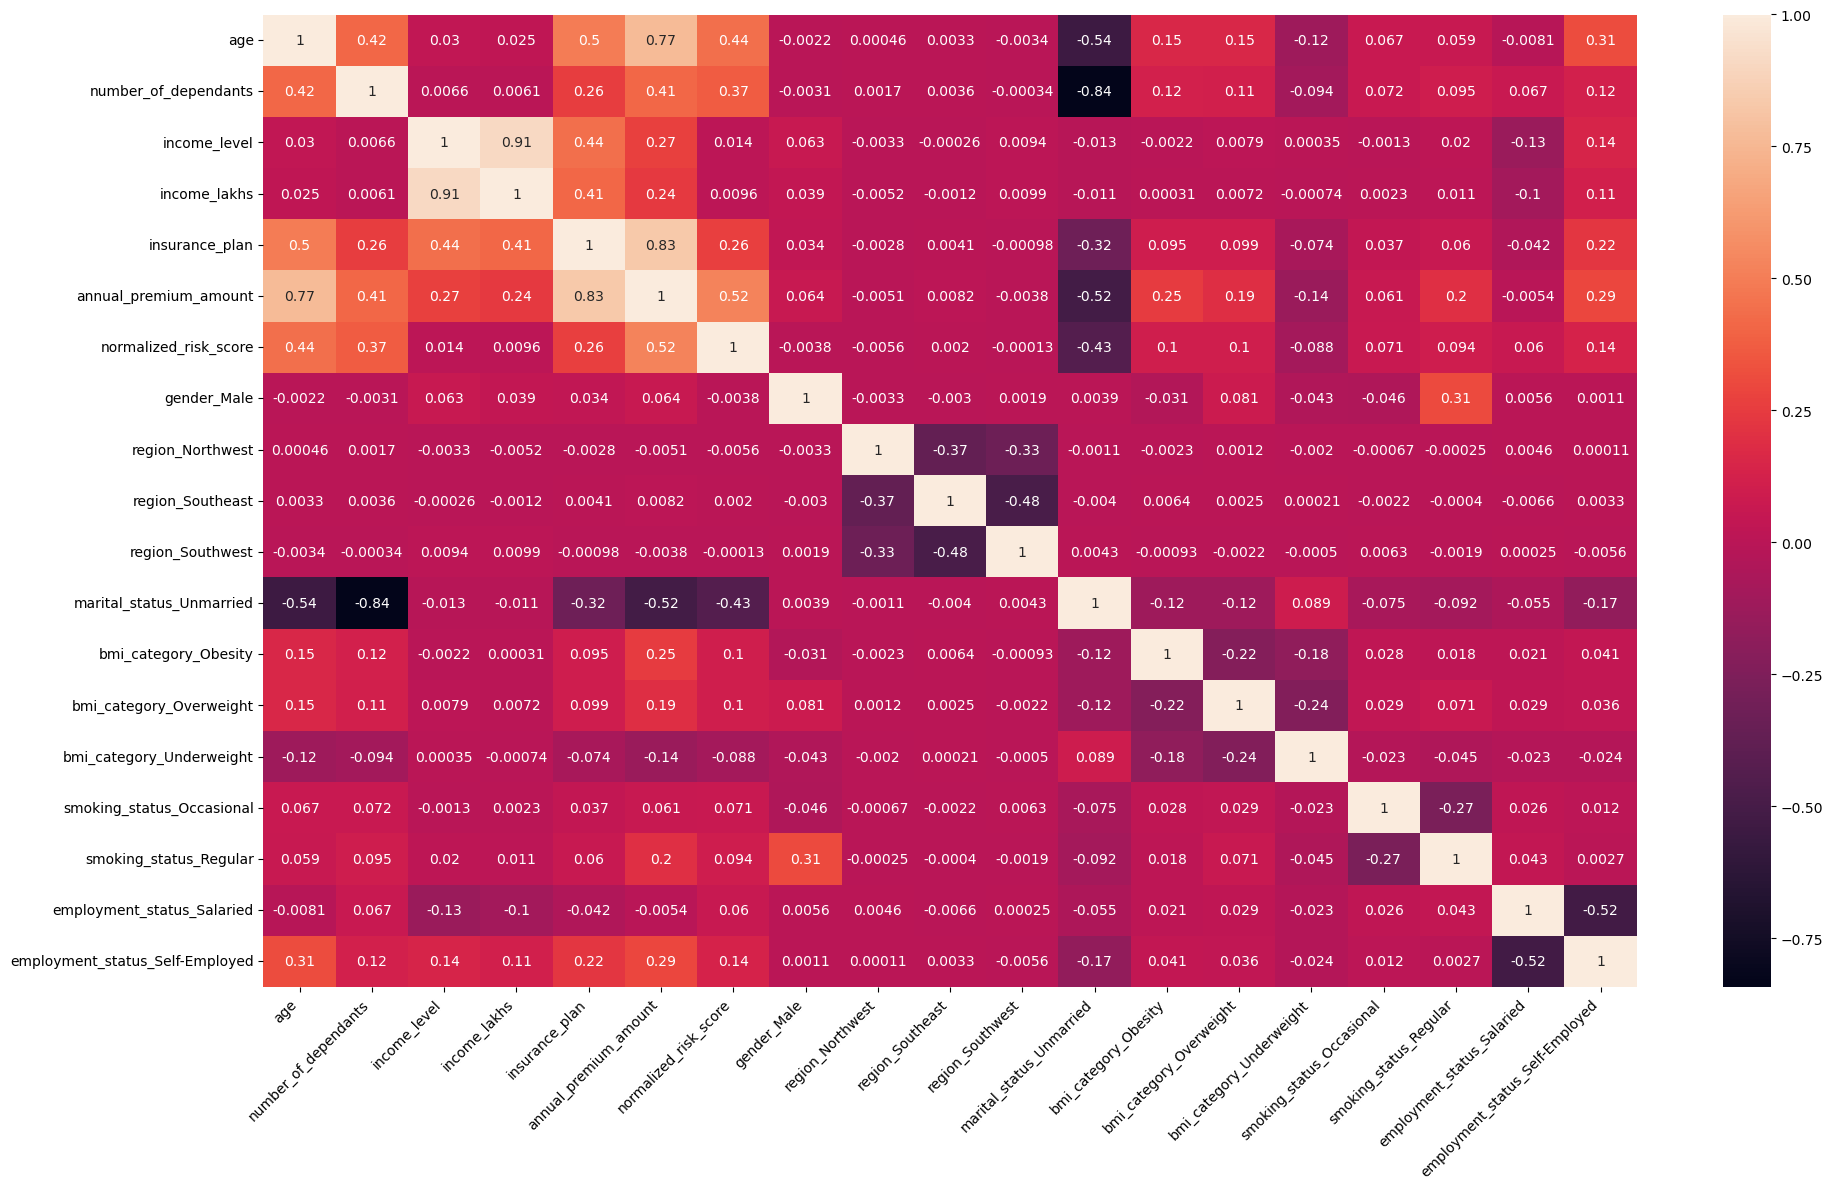

In [82]:
cm = df4.corr()
plt.figure(figsize=(20,12)) 
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Scaling the Numeric data 

In [83]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [84]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [85]:
X = df4.drop('annual_premium_amount', axis = 'columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


In [86]:
X

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.111111,0.0,0.666667,0.343434,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,0,1
49996,0.537037,0.4,1.000000,0.818182,1.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0
49997,0.055556,0.0,0.666667,0.313131,0.0,0.000000,1,1,0,0,1,0,0,0,0,1,0,0
49998,0.000000,0.4,0.333333,0.191919,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0


### Variance Inflation factor - to reduce Multicollinarity 

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [88]:
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [89]:
calculate_vif(X.drop('income_level', axis = 'columns'))

,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [90]:
X_reduced = X.drop('income_level', axis = 'columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


# Model Training 

In [91]:
X_reduced.sample(5)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42336,0.666667,0.8,0.222222,1.0,0.428571,1,0,1,0,0,0,0,0,0,1,1,0
49927,0.500000,0.6,0.303030,0.5,0.000000,0,0,0,0,0,0,0,0,0,0,1,0
12427,0.203704,0.6,0.010101,0.0,0.428571,0,0,0,0,0,0,0,0,1,0,1,0
32684,0.370370,0.8,0.484848,1.0,0.785714,0,0,0,0,0,0,0,1,0,0,1,0
44886,0.129630,0.6,0.030303,0.0,0.000000,1,0,0,0,0,0,1,0,0,0,1,0


In [92]:
X_train , X_test , y_train ,y_test = train_test_split(X_reduced , y, test_size = 0.3, random_state = 10)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (34935, 17)
X_test: (14973, 17)
y_train: (34935,)
y_test: (14973,)


### Linear Regression Model and Evaluation Metrics

In [808]:
X_train.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [93]:
# Initialize the LinearRegression
model_lr = LinearRegression()

# Train the model (assuming you have X_train and y_train)

model_lr.fit(X_train , y_train)

# Model coefficient and intercept 
print("Model coefficient is",model_lr.coef_)
print("Model intercept is",model_lr.intercept_)
print()

# Evaluate the model score
train_score= model_lr.score(X_train , y_train)
test_score = model_lr.score(X_test , y_test)
print(f'Model score for train data is {train_score}')
print(f'Model score for test data is {test_score}')
print()

# Make predictions (assuming you have X_test)
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model (example using Mean squared error and R - squared) 
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test , y_pred_lr)
print(f"Mean squared error is {mse}")
print(f"R - squared is {r2}")

Model coefficient is [11160.92646188  -676.44399066  -514.22981577 12557.01293645
  4810.35770228   168.64666183   -35.7192924     39.96512973
   -24.65292857  -935.76061134  3387.91145477  1599.36226775
   391.1713038    735.91227798  2234.8047119    155.9846743
   415.90397305]
Model intercept is 4824.300272127361

Model score for train data is 0.928214357691676
Model score for test data is 0.9280547230217836

Mean squared error is 5165611.9130279925
R - squared is 0.9280547230217836


In [94]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [95]:
feature_importance  = model_lr.coef_
coef_df = pd.DataFrame(feature_importance , index = X_test.columns,columns = ['Coefficients'])
coef_df.sort_values(by = 'Coefficients' , ascending = True)

,Coefficients
marital_status_Unmarried,-935.760611
number_of_dependants,-676.443991
income_lakhs,-514.229816
region_Northwest,-35.719292
region_Southwest,-24.652929
region_Southeast,39.965130
employment_status_Salaried,155.984674
gender_Male,168.646662
bmi_category_Underweight,391.171304
employment_status_Self-Employed,415.903973


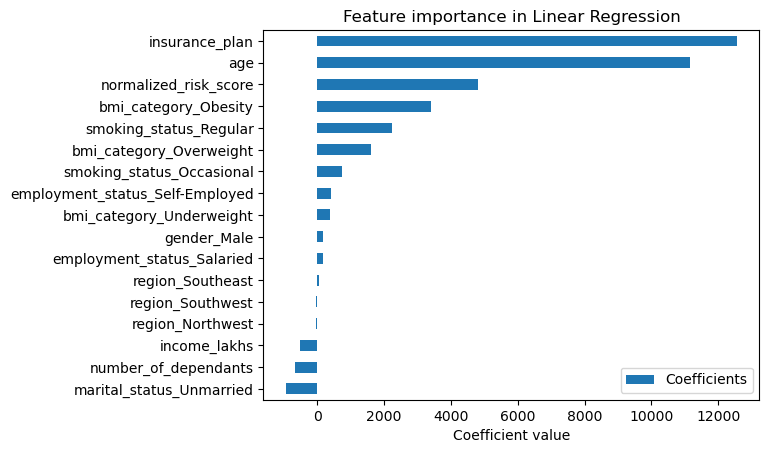

In [96]:
coef_df.sort_values(by = 'Coefficients' , ascending = True).plot(kind = 'barh')
plt.title("Feature importance in Linear Regression")
plt.xlabel("Coefficient value")
plt.show()

### Linear Regression Model- Ridge Regularization and Evaluation Metrics

In [97]:
# Initialize the Ridge
model_rg = Ridge(alpha = 10)

# Train the model (assuming you have X_train and y_train) and calcualte Model score 
model_rg.fit(X_train , y_train)
train_score_rg= model_rg.score(X_train , y_train)
test_score_rg = model_rg.score(X_test , y_test)
print(f'Model score for train data {train_score_rg}')
print(f'Model score for test data {test_score_rg}')

# Make predictions (assuming you have X_test)
y_pred_rg = model_rg.predict(X_test)

# Evaluate the model (example using Mean squared error and R - squared) 
mse = mean_squared_error(y_test, y_pred_rg)
r2 = r2_score(y_test , y_pred_rg)
print(f"Mean squared error is {mse}")
print(f"R - squared is {r2}")

Model score for train data 0.9282106074563636
Model score for test data 0.9280459054997704
Mean squared error is 5166245.0038807625
R - squared is 0.9280459054997704


## XGBoost Regressor 

In [98]:
from xgboost import XGBRegressor

# Initialize the XGBRegressor
model_xgb = XGBRegressor()  # Or with specific parameters

# Train the model (assuming you have X_train and y_train)
model_xgb.fit(X_train, y_train)
train_score_xgb = model_xgb.score(X_train , y_train)
test_score_xgb  = model_xgb.score(X_test , y_test)
print(f'Model score for train data {train_score_xgb}')
print(f'Model score for test data {test_score_xgb}')

# Make predictions (assuming you have X_test)
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model (example using Mean squared error and R - squared) 
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred_xgb)
print(f"Mean squared error is {mse}")
print(f"Root Mean squared error is {rmse}")
print(f"R - squared is {r2}")

Model score for train data 0.9860964164832711
Model score for test data 0.9809534637207582
Mean squared error is 1367525.6922808294
Root Mean squared error is 1169.412541527082
R - squared is 0.9809534637207582


## Randomized SearchCV 

In [99]:
model_xgb = XGBRegressor() 
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state = 42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9809474553641963

In [532]:
#df_result_cv = pd.DataFrame(random_search.cv_results_)
#df_result_cv[[ 'param_n_estimators','param_max_depth','params','mean_test_score']]

In [100]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [102]:
best_model = random_search.best_estimator_
#best_model

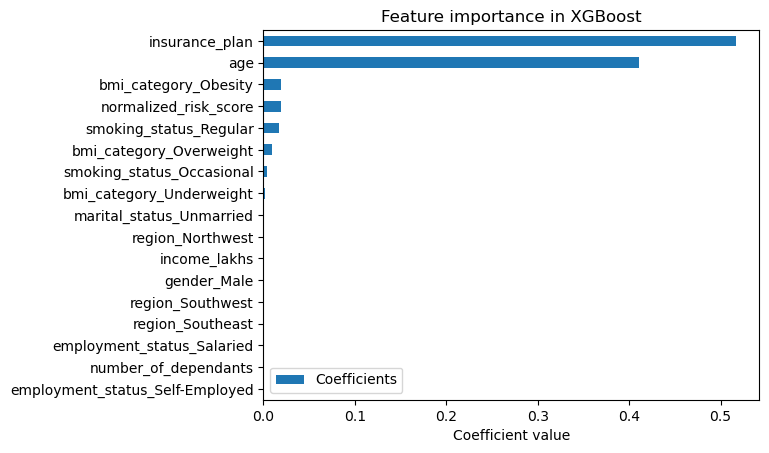

In [103]:
feature_importance  = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importance , index = X_test.columns,columns = ['Coefficients'])
coef_df.sort_values(by = 'Coefficients' , ascending = True).plot(kind = 'barh')
plt.title("Feature importance in XGBoost")
plt.xlabel("Coefficient value")
plt.show()

## Error Analysis

In [104]:
y_pred = best_model.predict(X_test)

In [105]:
y_pred

array([20334.953 , 29378.78  , 20618.186 , ..., 10615.658 ,  6820.886 ,
        6942.3438], dtype=float32)

In [106]:
y_test

3598     20554
35794    29647
43608    20560
42730     5018
18936     8929
         ...  
5621     18848
6069      6956
21592     8332
49274     5571
27977     8922
Name: annual_premium_amount, Length: 14973, dtype: int64

In [107]:
residuals = y_pred - y_test 
residuals_pct = (residuals * 100) / y_test 
residuals_pct

3598     -1.065714
35794    -0.904714
43608     0.283004
42730    46.529087
18936    -8.127540
           ...    
5621     -1.052530
6069     -5.608797
21592    27.408284
49274    22.435581
27977   -22.188481
Name: annual_premium_amount, Length: 14973, dtype: float64

In [110]:
result_df = pd.DataFrame(
    {
        'actual' : y_test,
        'predicted' : y_pred,
        'diff' : residuals,
        'diff_pct' : residuals_pct

    })
result_df.sample(5)

,actual,predicted,diff,diff_pct
4901,34041,33124.875000,-916.125000,-2.691240
28320,9024,9608.422852,584.422852,6.476317
33670,26980,26805.298828,-174.701172,-0.647521
21382,7972,9935.941406,1963.941406,24.635492
142,17460,17654.541016,194.541016,1.114210


In [1030]:
result_df.shape

(14973, 4)

<Axes: xlabel='diff_pct', ylabel='Count'>

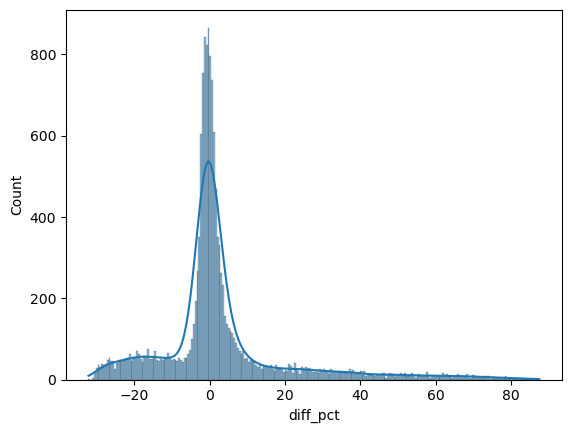

In [111]:
sns.histplot(result_df.diff_pct , kde = True)

In [112]:
extreme_error_threshold = 10
extreme_result_df = result_df[np.abs(result_df['diff_pct']) > extreme_error_threshold ]
extreme_result_df.shape


(4487, 4)

In [113]:
result_df.shape

(14973, 4)

In [1015]:
# Total error percentage in model 
extreme_error_pct = extreme_result_df.shape[0] * 100 / result_df.shape[0]
extreme_error_pct

# It means model 29% predictions are incorrect 

29.967274427302478

In [114]:
result_df[np.abs(result_df['diff_pct']) > 50].sort_values(by = 'diff_pct', ascending = False).shape

(549, 4)

## Try to find out what are the root cause for such high margin of errors

In [115]:
extreme_result_df.head()

,actual,predicted,diff,diff_pct
42730,5018,7352.829590,2334.829590,46.529087
20029,5140,6670.849121,1530.849121,29.783057
4294,9631,7053.477539,-2577.522461,-26.762771
44419,4687,6670.849121,1983.849121,42.326629
6707,8826,10047.326172,1221.326172,13.837822


In [116]:
extreme_result_df.columns

Index(['actual', 'predicted', 'diff', 'diff_pct'], dtype='object')

In [117]:
extreme_result_df.index

Index([42730, 20029,  4294, 44419,  6707, 11728, 15740, 35065,  9654, 22679,
       ...
       36158, 30386, 21184, 45020,  8249,  8767, 25179, 21592, 49274, 27977],
      dtype='int64', length=4487)

In [118]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
3598,0.481481,0.4,0.343434,0.5,0.428571,1,0,1,0,1,0,1,0,0,1,1,0
35794,0.648148,0.6,0.202020,1.0,0.000000,1,0,0,0,0,1,0,0,1,0,1,0
43608,0.537037,1.0,0.323232,0.5,0.000000,0,1,0,0,0,1,0,0,0,0,0,1
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
18936,0.074074,0.0,0.202020,0.0,0.428571,1,0,0,1,1,0,1,0,0,1,0,1


In [119]:
# X_test contain indexes of extreme_result_df beause extreme_result_df are part of  X_test- that show high margin error)
X_test.index

Index([ 3598, 35794, 43608, 42730, 18936, 45416, 20029,  4294, 39145,  3152,
       ...
        4554,  9086,  8767,   603, 25179,  5621,  6069, 21592, 49274, 27977],
      dtype='int64', length=14973)

In [120]:
X_test.shape

(14973, 17)

In [121]:
# Creating a seperate dataframe to represent error margin (extreme_result_df) in original X_test 
extreme_error_df = X_test.loc[extreme_result_df.index]
extreme_error_df.shape

(4487, 17)

In [122]:
# Actual error in original X_test that are showing wrong prediction 
extreme_error_df.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0


In [123]:
extreme_error_df.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [124]:
X_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
3598,0.481481,0.4,0.343434,0.5,0.428571,1,0,1,0,1,0,1,0,0,1,1,0


In [125]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

<Axes: xlabel='income_lakhs', ylabel='Count'>

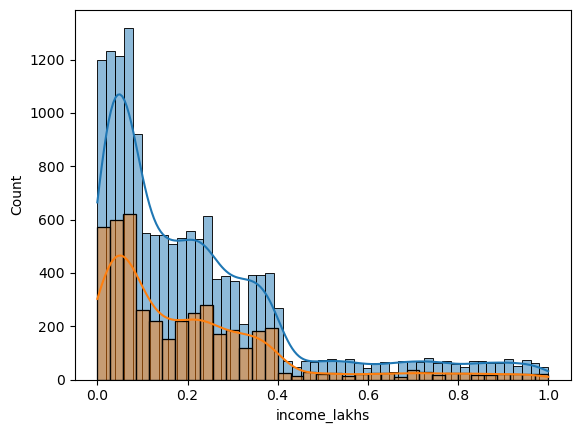

In [126]:
sns.histplot(X_test.income_lakhs ,label = 'overall', kde = True)
sns.histplot(extreme_error_df.income_lakhs, label = 'Extreme Error',kde = True)  

In [127]:
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
20029,0.018519,0.2,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.020202,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0
44419,0.055556,0.0,0.242424,0.0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0
6707,0.111111,0.2,0.070707,0.5,0.000000,1,0,0,0,1,0,0,1,0,0,0,0


### Analyize the feature which are responsilbe for giving higher error 

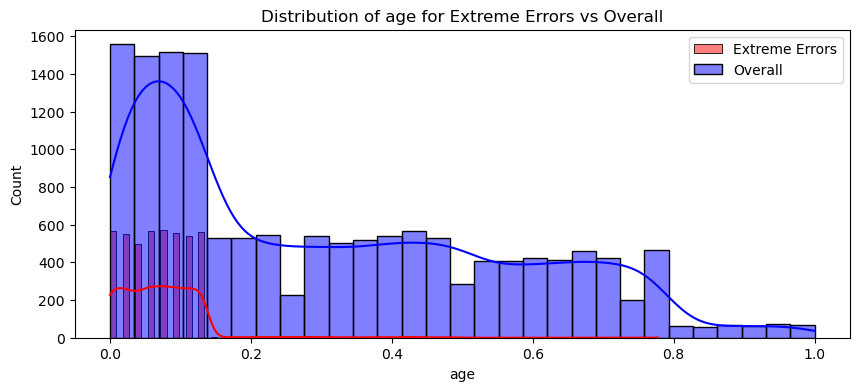

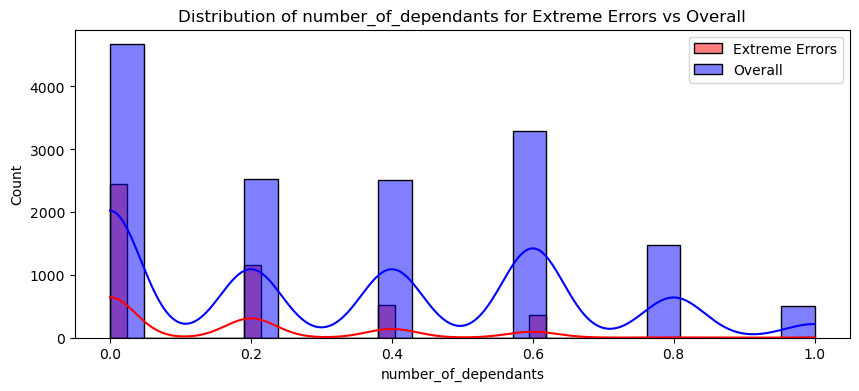

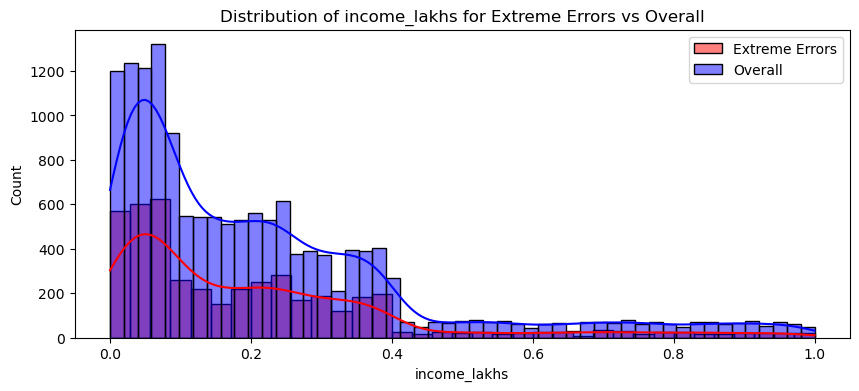

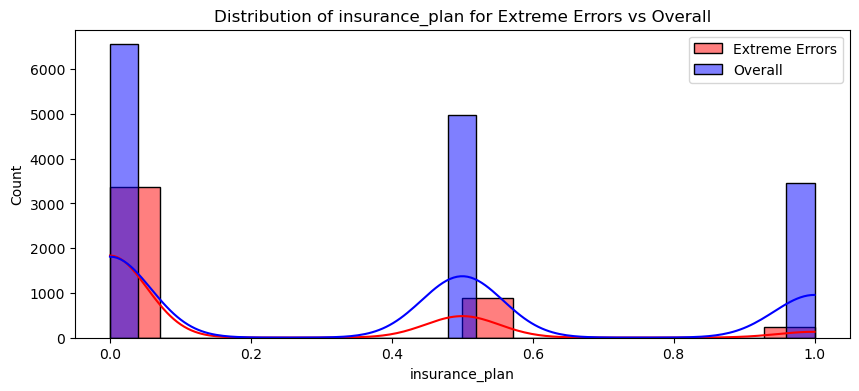

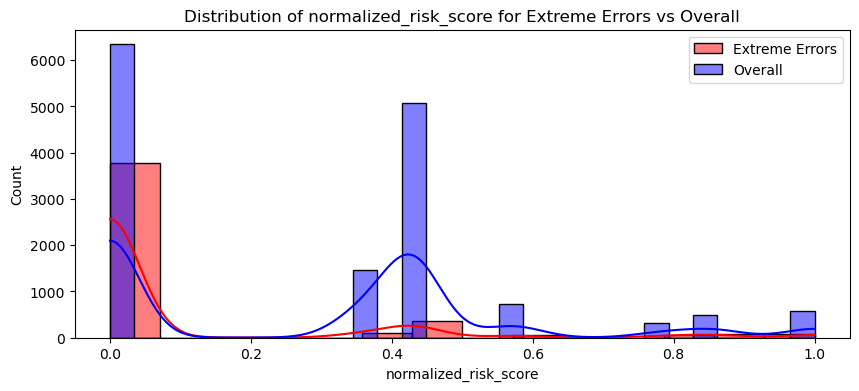

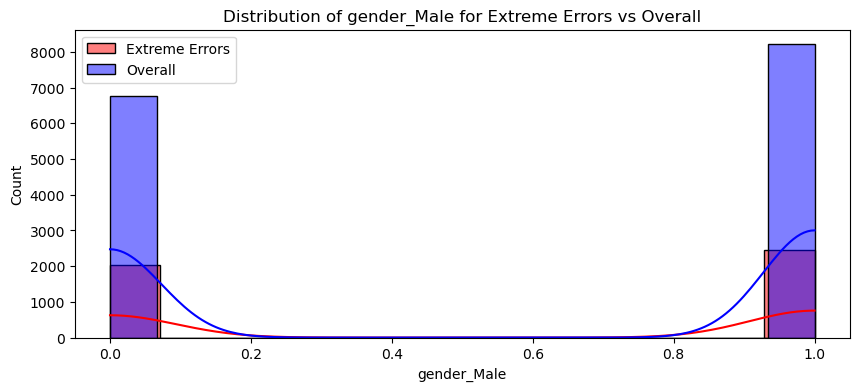

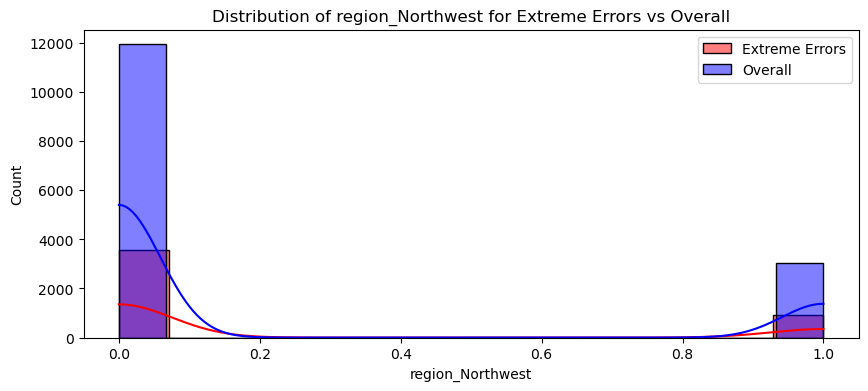

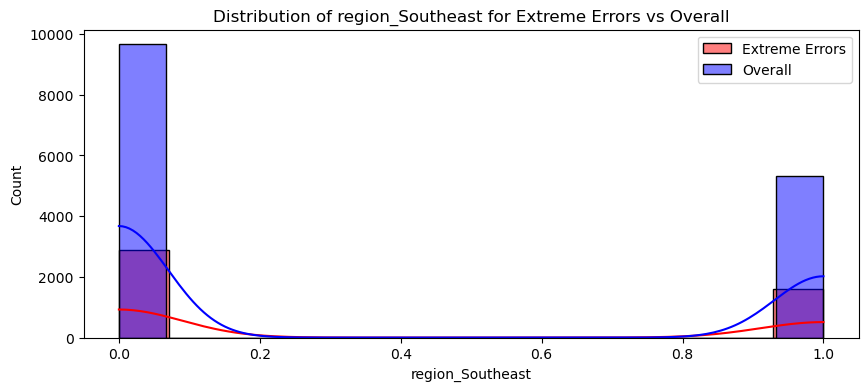

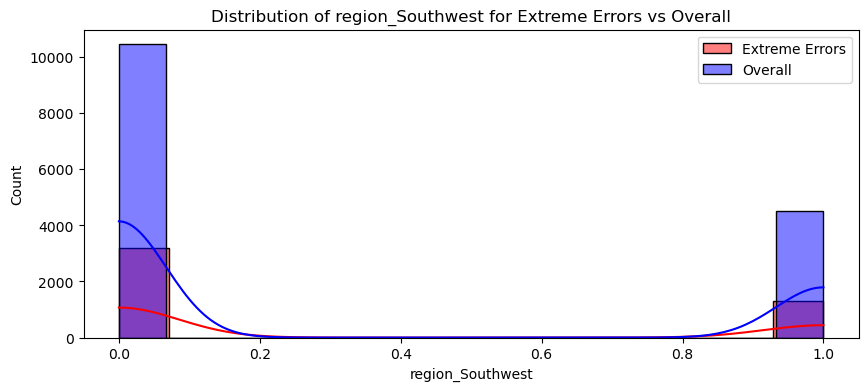

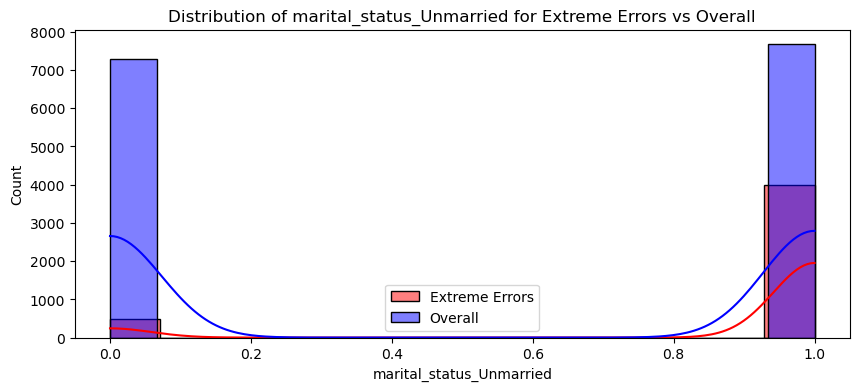

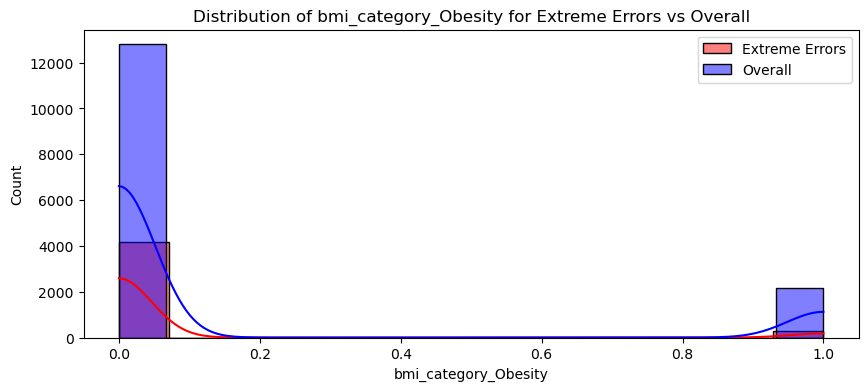

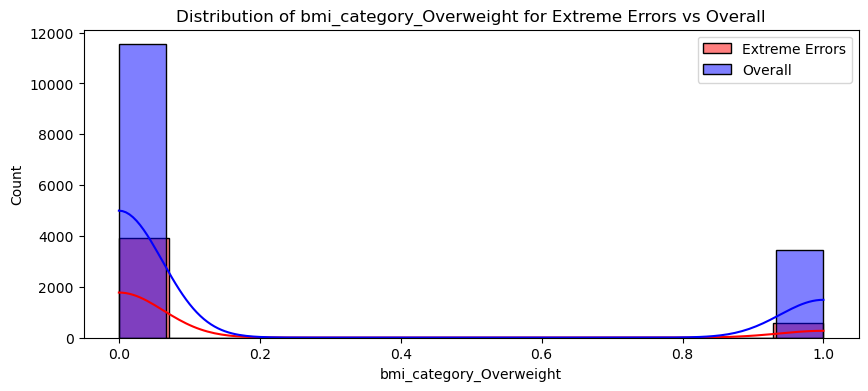

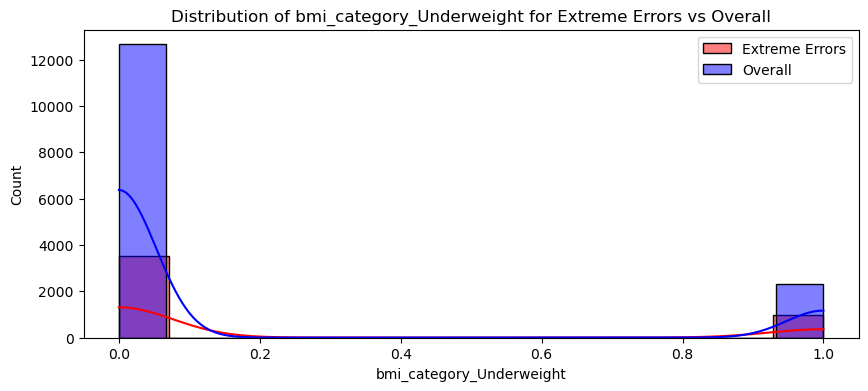

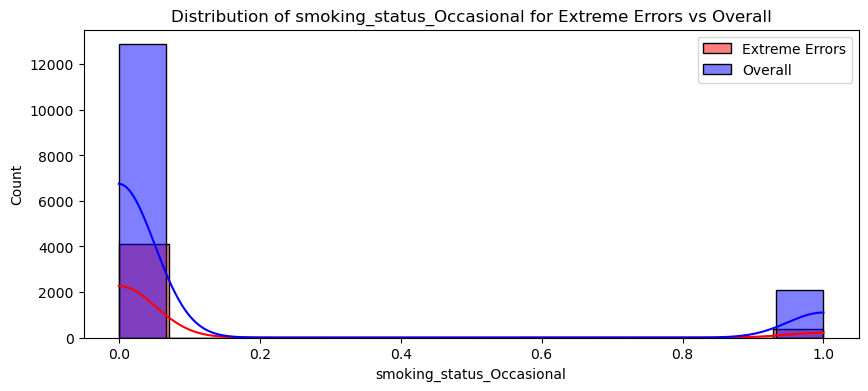

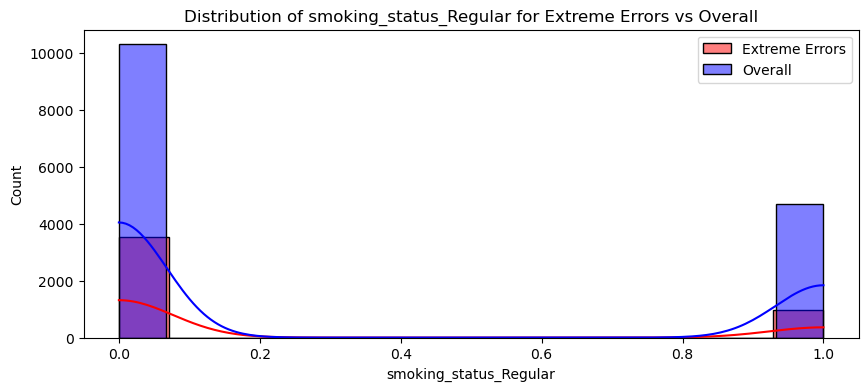

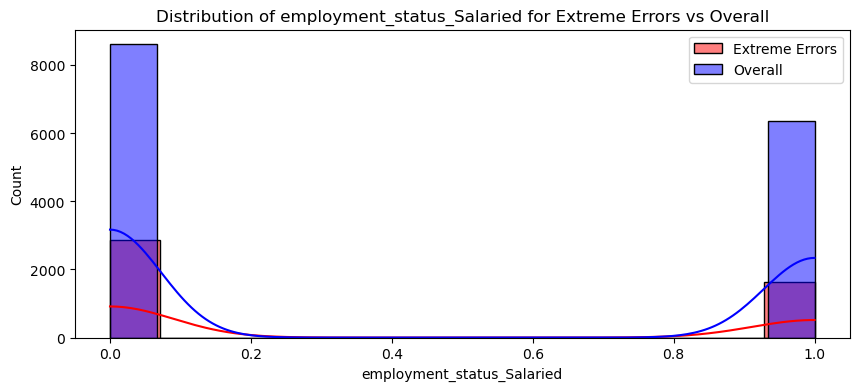

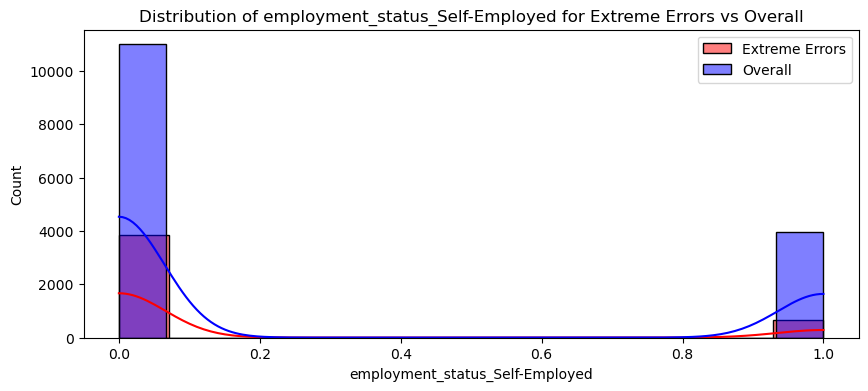

In [128]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_error_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

<Axes: xlabel='age', ylabel='Count'>

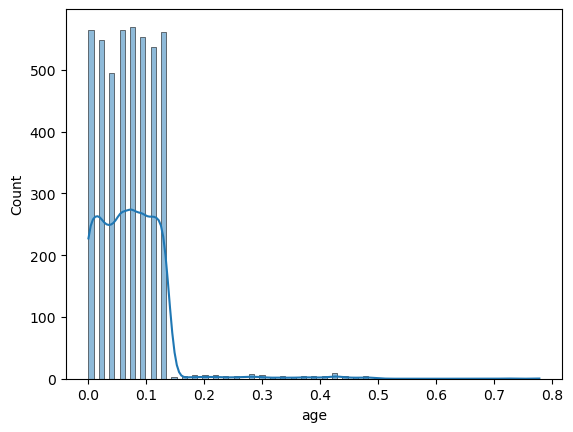

In [1046]:
sns.histplot(extreme_error_df['age'] , kde = True)

In [129]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [130]:
extreme_error_df.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [131]:
extreme_error_df['income_level'] = -1

In [132]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-2.0,14.0,1.0
1,19.0,1.0,-2.0,4.0,1.0
2,18.0,1.0,-2.0,3.0,1.0
3,21.0,0.0,-2.0,25.0,1.0
4,24.0,1.0,-2.0,8.0,2.0
...,...,...,...,...,...
4482,19.0,1.0,-2.0,8.0,1.0
4483,25.0,0.0,-2.0,12.0,1.0
4484,21.0,0.0,-2.0,7.0,2.0
4485,21.0,1.0,-2.0,8.0,1.0


<Axes: xlabel='age', ylabel='Count'>

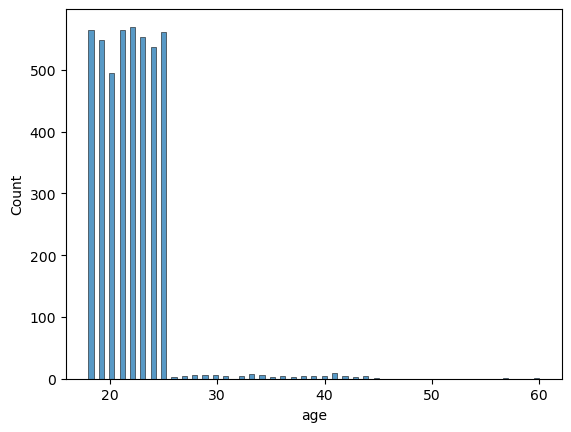

In [133]:
sns.histplot(df_reversed['age'])

In [134]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4487.000000,4487.000000,4487.0,4487.000000,4487.000000
mean,21.804992,0.739247,-2.0,21.182527,1.302429
std,3.172355,0.968855,0.0,20.598596,0.563135
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,20.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,15.000000,1.000000
75%,24.000000,1.000000,-2.0,30.000000,1.000000
max,60.000000,5.000000,-2.0,100.000000,3.000000


In [135]:
df_reversed['age'].quantile([0.75,0.95, 0.97])

0.75    24.0
0.95    25.0
0.97    25.0
Name: age, dtype: float64

### Saving Trained Model Object Using Pickle

In [377]:
#import pickle

In [1048]:
# 2. Save the model to a pickle file
#filename = 'xgbr_annual_premium_amount_v1.pkl'  # Choose a filename
#pickle.dump(model_xgb, open(filename, 'wb'))  # 'wb' for write binary

#print(f"Model saved to {filename}")

In [379]:
# 3. (Optional) Load the model from the pickle file later
#loaded_model = pickle.load(open(filename, 'rb'))  # 'rb' for read binary

#predictions = loaded_model.predict(X_test)
#print(f"Predictions using loaded model: {predictions}")

Predictions using loaded model: [ 9116.17  14082.32   7362.293 ... 10457.592 28622.568 28588.068]


In [380]:
# predictions

array([ 9116.17 , 14082.32 ,  7362.293, ..., 10457.592, 28622.568,
       28588.068], dtype=float32)

In [382]:
# y_pred_xgb

array([ 9116.17 , 14082.32 ,  7362.293, ..., 10457.592, 28622.568,
       28588.068], dtype=float32)

In [385]:
# model_xgb.score(X_test , y_test)

0.980961477244823

In [386]:
# loaded_model.score(X_test , y_test)

0.980961477244823